# Random Forests for Image Classification




In [1]:
# %pip install --quiet --upgrade pip 
# %pip install numpy --quiet
# %pip install PyArrow --quiet
# %pip install Pandas --quiet
# %pip install scikit-learn --quiet

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

Loading MNIST dataset...


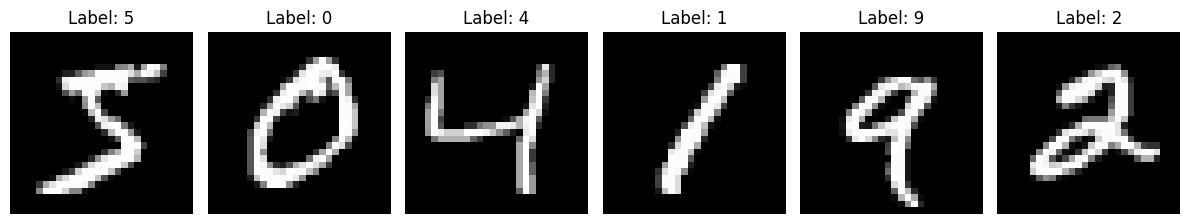

In [17]:

def show_data(images, labels, n=6):
    plt.figure(figsize=(12, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show sample predictions
show_data(X, y)

In [6]:
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9672857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [15]:
decision_tree = model.estimators_[0]
print(f"Number of nodes in the tree: {decision_tree.tree_.node_count}")
print(f"Depth of the tree: {decision_tree.tree_.max_depth}")

Number of nodes in the tree: 9377
Depth of the tree: 34


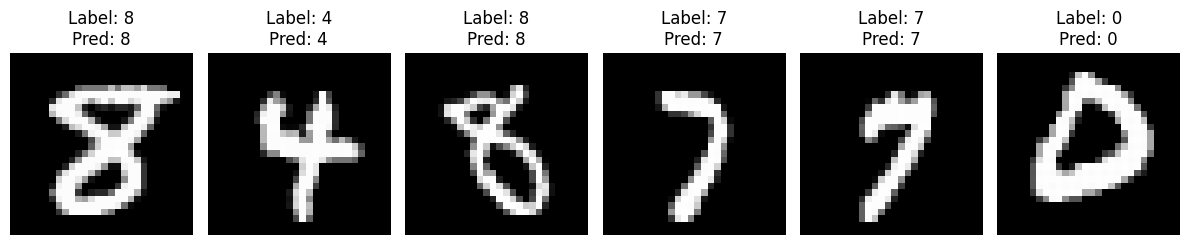

In [11]:
def show_predictions(images, labels, predictions, n=6):
    plt.figure(figsize=(12, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show sample predictions
show_predictions(X_test, y_test, y_pred)

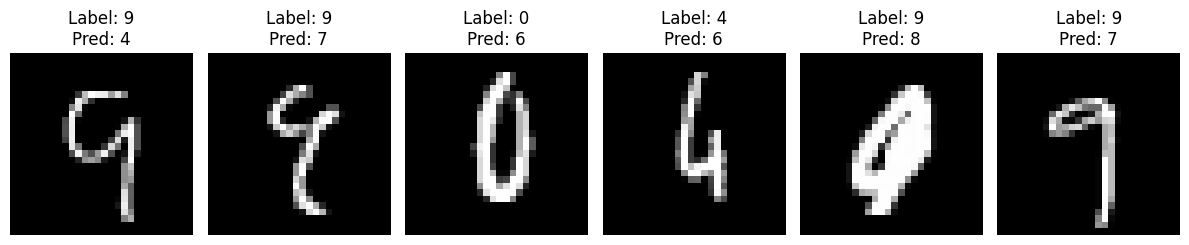

In [16]:
def show_errors(images, labels, predictions, n=6):
    plt.figure(figsize=(12, 4))
    error_count = 0
    for i in range(len(labels)):
        if labels[i] != predictions[i]:
            plt.subplot(1, n, error_count + 1)
            plt.imshow(images[i].reshape(28, 28), cmap='gray')
            plt.title(f"Label: {labels[i]}\nPred: {predictions[i]}")
            plt.axis('off')
            error_count += 1
            if error_count >= n:
                break
    plt.tight_layout()
    plt.show()

# Show sample predictions
show_errors(X_test, y_test, y_pred)